In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Blank Image


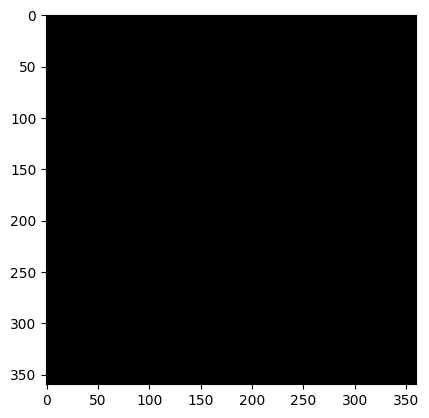

In [27]:
IMG_DIMS = (360,360)
CENTER = (IMG_DIMS[0]//2, IMG_DIMS[1]//2)
RADIUS = 160

WHITE = (255, 255, 255)

image = np.zeros(IMG_DIMS, dtype=np.uint8)

print("Blank Image")
plt.imshow(image, cmap='gray')

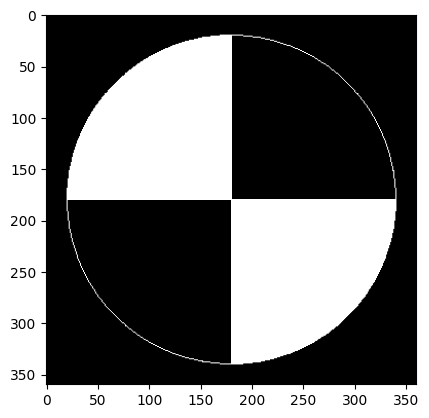

In [28]:
# Draw Quadrants.
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=0, endAngle=90, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=90, endAngle=180, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=180, endAngle=270, color=WHITE)
image = cv2.ellipse(image, CENTER, axes=(RADIUS, RADIUS), angle=0, startAngle=270, endAngle=360, color=WHITE)


# Draw lines to seperate quadrants.
image = cv2.line(image, (IMG_DIMS[0]//2 - 160, IMG_DIMS[1]//2), (IMG_DIMS[0]//2 + 160, IMG_DIMS[1]//2), color=WHITE)
image = cv2.line(image, (IMG_DIMS[0]//2, IMG_DIMS[1]//2 - RADIUS), (IMG_DIMS[0]//2, IMG_DIMS[1]//2 + RADIUS), color=WHITE)

# Fill in colors.
cv2.floodFill(image, None, (IMG_DIMS[0]//2 - 80, IMG_DIMS[1]//2 - RADIUS//2), 255)
cv2.floodFill(image, None, (IMG_DIMS[0]//2 + 80, IMG_DIMS[1]//2 + RADIUS//2), 255)
plt.imshow(image, cmap='gray')

TOP_LEFT = [0:175,0:175]

BOTTOM_LEFT=[175:350,0:175]

TOP_RIGHT = [0:175,175:350]

BOTTOM_RIGHT = [175:350, 175:350] 

top_left_blurred_image


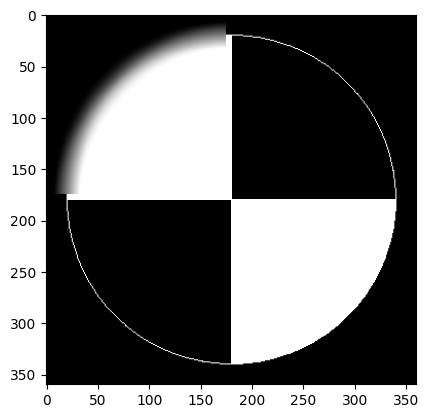

bottom_left_blurred_image


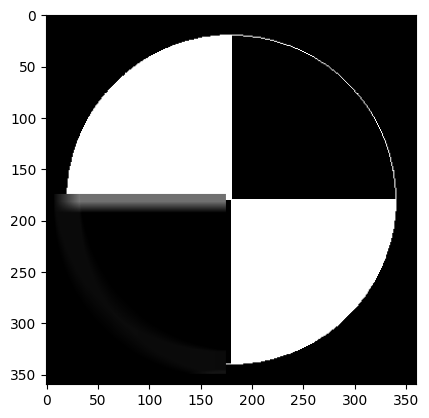

top_right_blurred_image


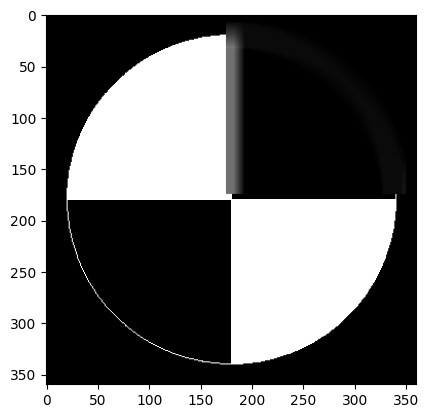

bottom_right_blurred_image


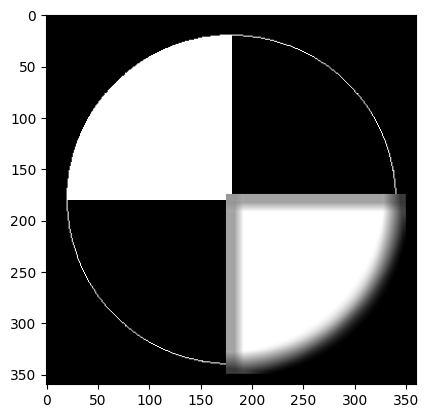

In [29]:
top_left_blurred_image = image.copy()
top_left_blurred_image[0:175, 0:175] = cv2.blur(image[0:175, 0:175] ,(25,25))

print('top_left_blurred_image')
plt.imshow(top_left_blurred_image, cmap='gray')
plt.show()

bottom_left_blurred_image = image.copy()
bottom_left_blurred_image[175:350, 0:175] = cv2.blur(image[175:350, 0:175] ,(25,25))

print('bottom_left_blurred_image')
plt.imshow(bottom_left_blurred_image, cmap='gray')
plt.show()

top_right_blurred_image = image.copy()
top_right_blurred_image[0:175, 175:350] = cv2.blur(image[0:175, 175:350] ,(25,25))

print('top_right_blurred_image')
plt.imshow(top_right_blurred_image, cmap='gray')
plt.show()

bottom_right_blurred_image = image.copy()
bottom_right_blurred_image[175:350, 175:350] = cv2.blur(image[175:350, 175:350] ,(25,25))

print('bottom_right_blurred_image')
plt.imshow(bottom_right_blurred_image, cmap='gray')
plt.show()


top_left


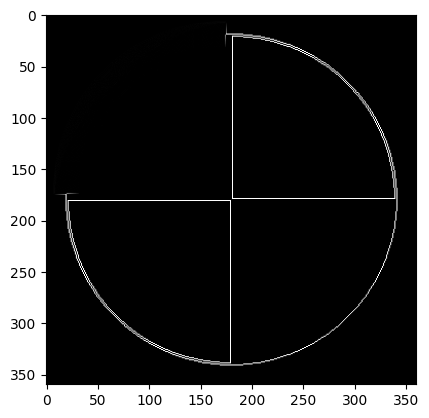

top left variance :  5.355379414310703
top right variance :  1250.2742318636567
bottom left variance :  1250.2742318636565
bottom right variance :  1191.8237245414414



top_right


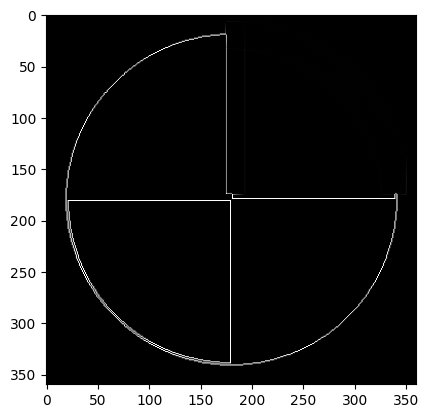

top left variance :  459.99160083298636
top right variance :  112.96492540801337
bottom left variance :  1248.9999833402746
bottom right variance :  1193.357250003432



bottom_left


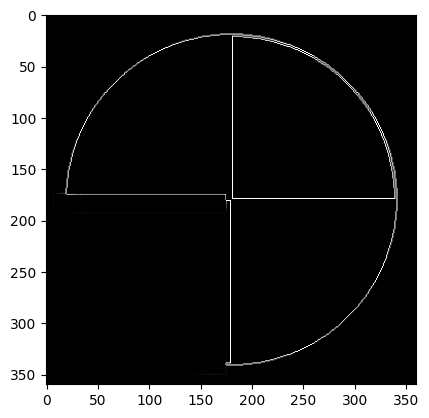

top left variance :  459.9916008329865
top right variance :  1248.9999833402746
bottom left variance :  112.96492540801337
bottom right variance :  1193.357250003432



bottom_right


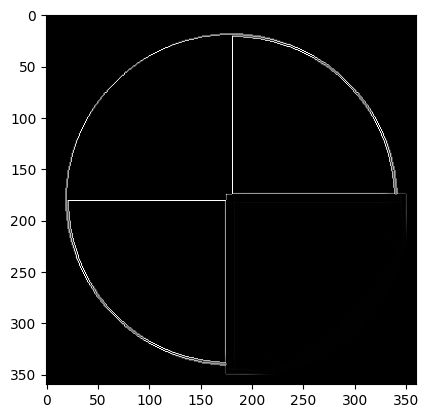

top left variance :  459.5769449662643
top right variance :  1373.6066786508288
bottom left variance :  1373.6066786508286
bottom right variance :  7.955182816759682





In [30]:
# Edge mask of each, and its corresponding variance.
blurred_images = [top_left_blurred_image, top_right_blurred_image, bottom_left_blurred_image, bottom_right_blurred_image]
names = ['top_left', 'top_right', 'bottom_left', 'bottom_right']

top_left_vars = []
bottom_left_vars = []
top_right_vars = []
bottom_right_vars = []

for i in range(4):
    mask = cv2.Laplacian(blurred_images[i], -1)
    print(names[i])
    plt.imshow(mask, cmap='gray')
    plt.show()

    #TOP_LEFT = [0:175,0:175]
    #BOTTOM_LEFT=[175:350,0:175]
    #TOP_RIGHT = [0:175,175:350]
    #BOTTOM_RIGHT = [175:350, 175:350] 

    top_left_var = mask[0:175, 0:175].var()
    bottom_left_var = mask[175:350, 0:175].var()
    top_right_var = mask[0:175, 175:350].var()
    bottom_right_var = mask[175:350, 175:350].var()

    top_left_vars.append(top_left_var)
    bottom_left_vars.append(bottom_left_var)
    top_right_vars.append(top_right_var)
    bottom_right_vars.append(bottom_right_var)

    print('top left variance : ', top_left_var)
    print('top right variance : ', top_right_var)
    print('bottom left variance : ', bottom_left_var)
    print('bottom right variance : ', bottom_right_var)
    print('\n\n')


Original image blurred (to find variance of various regions without blurring)

original


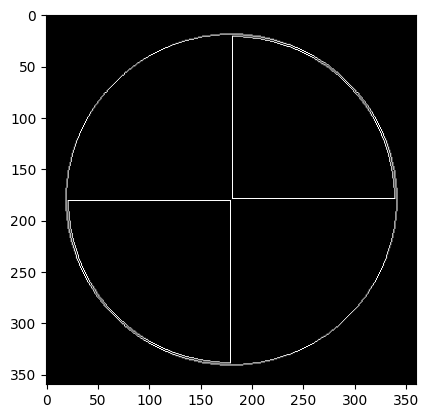

top left variance :  459.5769449662643
top right variance :  1248.9999833402746
bottom left variance :  1248.9999833402746
bottom right variance :  1191.8237245414414





In [31]:
mask = cv2.Laplacian(image, -1)
print('original')
plt.imshow(mask, cmap='gray')
plt.show()

#TOP_LEFT = [0:175,0:175]
#BOTTOM_LEFT=[175:350,0:175]
#TOP_RIGHT = [0:175,175:350]
#BOTTOM_RIGHT = [175:350, 175:350] 

src_top_left_var = mask[0:175, 0:175].var()
src_bottom_left_var = mask[175:350, 0:175].var()
src_top_right_var = mask[0:175, 175:350].var()
src_bottom_right_var = mask[175:350, 175:350].var()

print('top left variance : ', src_top_left_var)
print('top right variance : ', src_top_right_var)
print('bottom left variance : ', src_bottom_left_var)
print('bottom right variance : ', src_bottom_right_var)
print('\n\n')


In [32]:
for i in range(4):
    if (top_left_vars[i] < src_top_left_var):
        print(names[i], ' has the top left part blurred. Variance difference : ', top_left_vars[i] - src_top_left_var)
    if (bottom_left_vars[i] < src_bottom_left_var):
        print(names[i], ' has the bottom left part blurred. Variance difference : ', bottom_left_vars[i] - src_bottom_left_var)
    if (top_right_vars[i] < src_top_right_var):
        print(names[i], ' has the top right part blurred. Variance difference : ', top_right_vars[i] - src_top_right_var)
    if (bottom_right_vars[i] < src_bottom_right_var):
        print(names[i], ' has the bottom right part blurred. Variance difference : ', bottom_right_vars[i] - src_bottom_right_var)

top_left  has the top left part blurred. Variance difference :  -454.22156555195363
top_right  has the top right part blurred. Variance difference :  -1136.0350579322612
bottom_left  has the bottom left part blurred. Variance difference :  -1136.0350579322612
bottom_right  has the bottom right part blurred. Variance difference :  -1183.8685417246818
